In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

In [156]:
train=pd.read_csv('train.csv')

In [157]:
X=train.drop('label',axis=1).values.reshape(len(train),28,28,1)
y=train.label.values

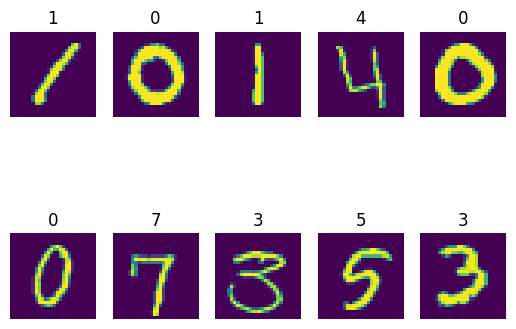

In [158]:
# select first 10 images for visualization
select=X[:10]
k=1
while k<=10:
    plt.subplot(2,5,k)
    plt.imshow(select[k-1])
    plt.title(y[k-1])
    plt.axis('off')
    k+=1

In [159]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
inputs=tf.keras.Input(shape=(28,28,1))
x=tf.keras.layers.Conv2D(32,2,activation='relu',strides=2,padding='same')(inputs)
x=tf.keras.layers.Conv2D(64,2,activation='relu',strides=2,padding='same')(x)
x=tf.keras.layers.MaxPooling2D(pool_size=2,strides=1,padding='same')(x)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(32,activation='relu')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(16,activation='relu')(x)
outputs=tf.keras.layers.Dense(10,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)

In [173]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [174]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid),callbacks=[callback])

Epoch 1/30
919/919 [==============================] - 4s 4ms/step - loss: 0.3762 - accuracy: 0.9040 - val_loss: 0.1688 - val_accuracy: 0.9496
Epoch 2/30
919/919 [==============================] - 3s 4ms/step - loss: 0.1105 - accuracy: 0.9673 - val_loss: 0.1385 - val_accuracy: 0.9567
Epoch 3/30
919/919 [==============================] - 3s 4ms/step - loss: 0.0815 - accuracy: 0.9757 - val_loss: 0.1067 - val_accuracy: 0.9678
Epoch 4/30
919/919 [==============================] - 3s 4ms/step - loss: 0.0613 - accuracy: 0.9811 - val_loss: 0.1016 - val_accuracy: 0.9704
Epoch 5/30
919/919 [==============================] - 3s 4ms/step - loss: 0.0528 - accuracy: 0.9827 - val_loss: 0.0800 - val_accuracy: 0.9760
Epoch 6/30
919/919 [==============================] - 3s 4ms/step - loss: 0.0454 - accuracy: 0.9845 - val_loss: 0.1017 - val_accuracy: 0.9707
Epoch 7/30
919/919 [==============================] - 3s 4ms/step - loss: 0.0382 - accuracy: 0.9872 - val_loss: 0.0788 - val_accuracy: 0.9769
Epoch 

<Axes: >

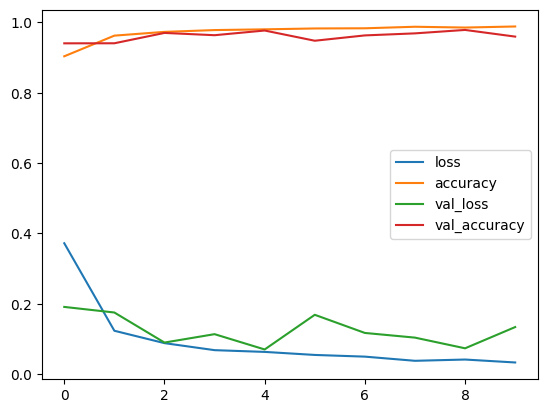

In [163]:
pd.DataFrame(history.history).plot()

In [164]:
test=pd.read_csv('test.csv')

In [165]:
test=test.values.reshape(len(test),28,28,1)

In [166]:
y_pred=model.predict(test)

In [167]:
y_pred=np.argmax(y_pred,axis=1)

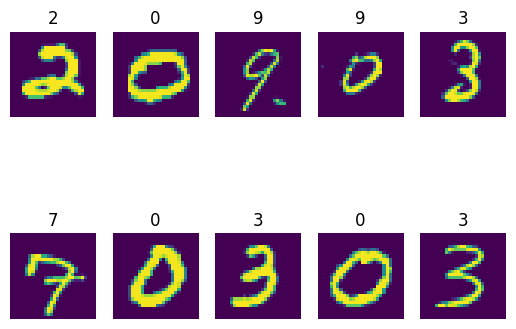

In [168]:
k=1
while k<=10:
    plt.subplot(2,5,k)
    plt.imshow(test[k-1])
    plt.title(y_pred[k-1])
    plt.axis('off')
    k+=1

In [169]:
submit=pd.read_csv('sample_submission.csv')

In [170]:
submit.Label=y_pred

In [171]:
submit.to_csv('result.csv',index=False)